In [1]:
!pip install -q tensorflow matplotlib numpy

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28)


In [4]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

TRAIN_RATIO = 0.8
NUM_TRAIN = int(60000 * TRAIN_RATIO)

In [5]:
full_train_ds = tf.data.Dataset.from_tensor_slices(
  (X_train, y_train)
)

In [6]:
for feat, label in full_train_ds.take(1):
  print(feat.shape, label)

(28, 28) tf.Tensor(5, shape=(), dtype=uint8)


In [7]:
full_train_ds = full_train_ds.shuffle(
    buffer_size=60000,
    seed=42,
    reshuffle_each_iteration=False
)

In [8]:
train_ds = full_train_ds.take(NUM_TRAIN)
val_ds   = full_train_ds.skip(NUM_TRAIN)
print(type(train_ds), type(val_ds))

train_ds = (
  train_ds
  .batch(BATCH_SIZE)
  .prefetch(AUTOTUNE)
)

val_ds = (
  val_ds
  .batch(BATCH_SIZE)
  .prefetch(AUTOTUNE)
)

test_ds = (
  tf.data.Dataset.from_tensor_slices((X_test, y_test))
  .batch(BATCH_SIZE)
  .prefetch(AUTOTUNE)
)

for feat, label in train_ds.take(1):
  print(feat.shape, label)

<class 'tensorflow.python.data.ops.take_op._TakeDataset'> <class 'tensorflow.python.data.ops.skip_op._SkipDataset'>
(32, 28, 28) tf.Tensor([8 9 2 9 5 2 5 6 4 8 7 6 6 1 4 8 7 0 3 7 5 4 7 6 2 0 3 1 5 9 1 0], shape=(32,), dtype=uint8)


In [9]:
mlp_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(mlp_model.summary())

history = mlp_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

# eval_results = mlp_model.evaluate(vectorized_test_ds, verbose=1)
# print("Test results (loss, accuracy, auc):", eval_results)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8036 - loss: 8.3749 - val_accuracy: 0.8823 - val_loss: 0.6222
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8962 - loss: 0.4805 - val_accuracy: 0.9054 - val_loss: 0.4076
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9238 - loss: 0.2954 - val_accuracy: 0.9259 - val_loss: 0.3302
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9352 - loss: 0.2525 - val_accuracy: 0.9336 - val_loss: 0.3047
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9387 - loss: 0.2389 - val_accuracy: 0.9355 - val_loss: 0.3012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9433 - loss: 0.2147 - val_accuracy: 0.9338 - val_loss: 0.3127
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9486 - loss: 0.2002 - val_accuracy: 0.9409 - val_loss: 0.2914
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9496 - loss: 0.20

In [10]:
mlp_model.evaluate(test_ds)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.3236


[0.2824026942253113, 0.9477999806404114]

In [11]:
def get_true_and_pred(model, dataset):
    y_true = []
    y_pred = []

    for x_batch, y_batch in dataset:
        preds = model.predict(x_batch, verbose=0)
        preds = tf.argmax(preds, axis=-1)

        y_true.append(y_batch.numpy())
        y_pred.append(preds.numpy())

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    return y_true, y_pred

def compute_confusion_matrix(y_true, y_pred, num_classes):
    return tf.math.confusion_matrix(
        y_true,
        y_pred,
        num_classes=num_classes
    )

def plot_confusion_matrix(cm, class_names, title):
    cm = cm.numpy()   # ⭐ QUAN TRỌNG

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


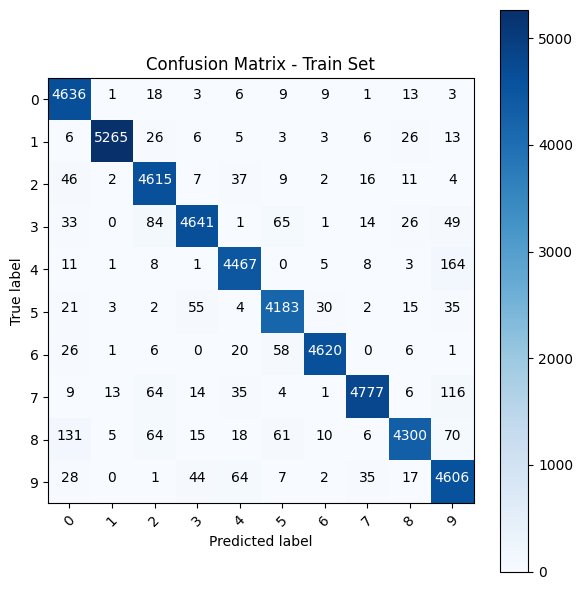

In [14]:
NUM_CLASSES = 10
class_names = [str(i) for i in range(10)]

y_true_train, y_pred_train = get_true_and_pred(mlp_model, train_ds)

cm_train = compute_confusion_matrix(
    y_true_train, y_pred_train, NUM_CLASSES
)

plot_confusion_matrix(
    cm_train,
    class_names,
    title="Confusion Matrix - Train Set"
)